# Character Detection using Yunet and OpenCV

*Réalisé par Ahmad EL KAAKOUR & Matthieu RANDRIANTSOA*

> Ce Notebook synthétise notre démarche pour exploiter des modèles de fondation dans le cadre de la détection et la reconnaissance de visages. Notre objectif et de permettre de reconnaitre les personnages présents sur la vidéo fournie en entrée.

## Détection de visage

TODO: Explication Pour la détection de visages, nous avons utilisé un modèle pré-entraîné fourni par OpenCV.

TODO: Explication entre les cellules suivantes

In [3]:
import mediapipe as mp
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import utils
import face_recognition

In [4]:
image1 = cv.imread('images/johnny-english-capture-1.png')
image2 = cv.imread('images/johnny-english-capture-2.png')

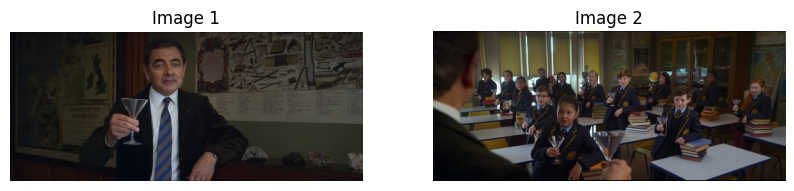

In [5]:
# Convert images from BGR to RGB for Matplotlib
image1_rgb = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
image2_rgb = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

# Plot the images side by side
plt.rcParams['figure.figsize'] = (10.0, 5.0)  # Adjust figure size
fig, axs = plt.subplots(1, 2)  # Create two subplots

# Display the first image
axs[0].imshow(image1_rgb)
axs[0].axis('off')  # Hide axes
axs[0].set_title("Image 1")

# Display the second image
axs[1].imshow(image2_rgb)
axs[1].axis('off')  # Hide axes
axs[1].set_title("Image 2")

plt.show()

In [7]:
# Use Mediapipe Face Detection tool

# Initialize MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [8]:
# Minimum detection confidence
min_detection_confidence = 0.9

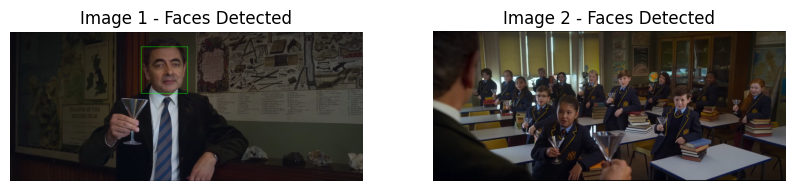

In [9]:
# Perform face detection using MediaPipe
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=min_detection_confidence) as face_detection:
    image1_faces = utils.detect_faces_mediapipe(image1.copy(), face_detection)
    image2_faces = utils.detect_faces_mediapipe(image2.copy(), face_detection)

# Convert images from BGR to RGB for Matplotlib
image1_faces_rgb = cv.cvtColor(image1_faces, cv.COLOR_BGR2RGB)
image2_faces_rgb = cv.cvtColor(image2_faces, cv.COLOR_BGR2RGB)

# Plot the images side by side with rectangles
plt.rcParams['figure.figsize'] = (10.0, 5.0)  # Adjust figure size
fig, axs = plt.subplots(1, 2)  # Create two subplots

# Display the first image with faces detected
axs[0].imshow(image1_faces_rgb)
axs[0].axis('off')  # Hide axes
axs[0].set_title("Image 1 - Faces Detected")

# Display the second image with faces detected
axs[1].imshow(image2_faces_rgb)
axs[1].axis('off')  # Hide axes
axs[1].set_title("Image 2 - Faces Detected")

plt.show()

TODO: Explication - C'est bien mais on remarque quelques erreurs

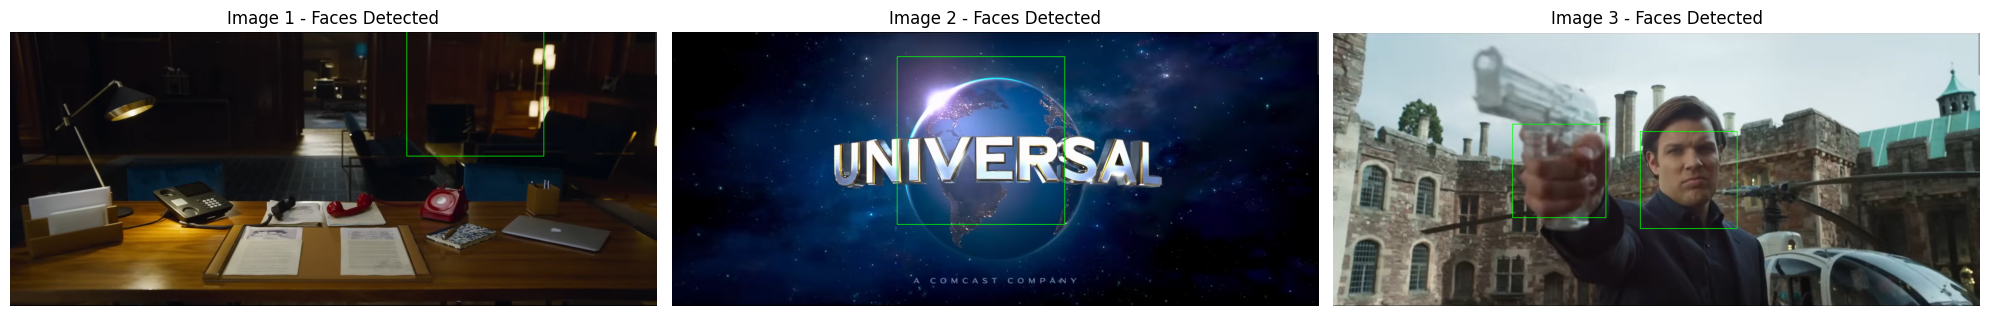

In [10]:
# List of image file paths
image_paths = [
    'images/johnny-english-capture-3.png',
    'images/johnny-english-capture-4.png',
    'images/johnny-english-capture-5.png'
]

# Load, process, and store results for all images
processed_images = []
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=min_detection_confidence) as face_detection:
    for path in image_paths:
        # Load each image
        image = cv.imread(path)
        # Detect faces and draw bounding boxes
        processed_image = utils.detect_faces_mediapipe(image.copy(), face_detection)
        # Convert to RGB for Matplotlib and append to results
        processed_images.append(cv.cvtColor(processed_image, cv.COLOR_BGR2RGB))

# Plot the images side by side
plt.rcParams['figure.figsize'] = (15.0, 10.0)  # Adjust figure size for 5 images
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # Create subplots for 5 images

for i, ax in enumerate(axs):
    ax.imshow(processed_images[i])  # Display each processed image
    ax.axis('off')  # Hide axes
    ax.set_title(f"Image {i+1} - Faces Detected")

plt.tight_layout()
plt.show()

TODO: remarques

In [11]:
# Initialize YuNet Face Detector
model_path = 'models/face_detection_yunet_2023mar.onnx'  # Path to your YuNet ONNX model
face_detector = cv.FaceDetectorYN_create(
    model=model_path,
    config="",
    input_size=(300, 300),
    score_threshold=0.5,
    nms_threshold=0.3,
    top_k=5000
)

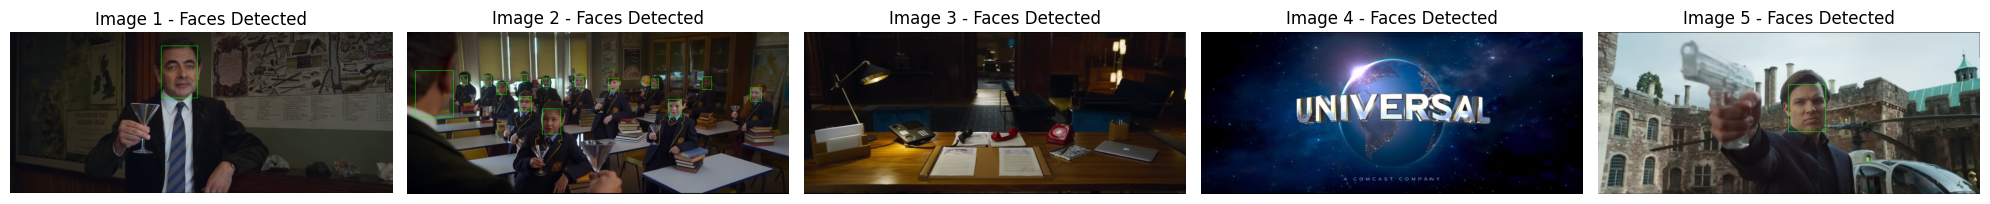

In [12]:
image_paths = [
    'images/johnny-english-capture-1.png',
    'images/johnny-english-capture-2.png',
    'images/johnny-english-capture-3.png',
    'images/johnny-english-capture-4.png',
    'images/johnny-english-capture-5.png'
]

# Process each image
processed_images = []
for path in image_paths:
    # Load the image
    image = cv.imread(path)
    # Detect faces and draw bounding boxes
    processed_image = utils.detect_faces_yunet(image.copy(), face_detector)
    # Convert BGR to RGB for Matplotlib and store
    processed_images.append(cv.cvtColor(processed_image, cv.COLOR_BGR2RGB))

# Plot the images side by side
plt.rcParams['figure.figsize'] = (20.0, 10.0)  # Adjust figure size for 5 images
fig, axs = plt.subplots(1, 5, figsize=(20, 5))  # Create subplots for 5 images

for i, ax in enumerate(axs):
    ax.imshow(processed_images[i])  # Display each processed image
    ax.axis('off')  # Hide axes
    ax.set_title(f"Image {i+1} - Faces Detected")

plt.tight_layout()
plt.show()

TODO: comparaison

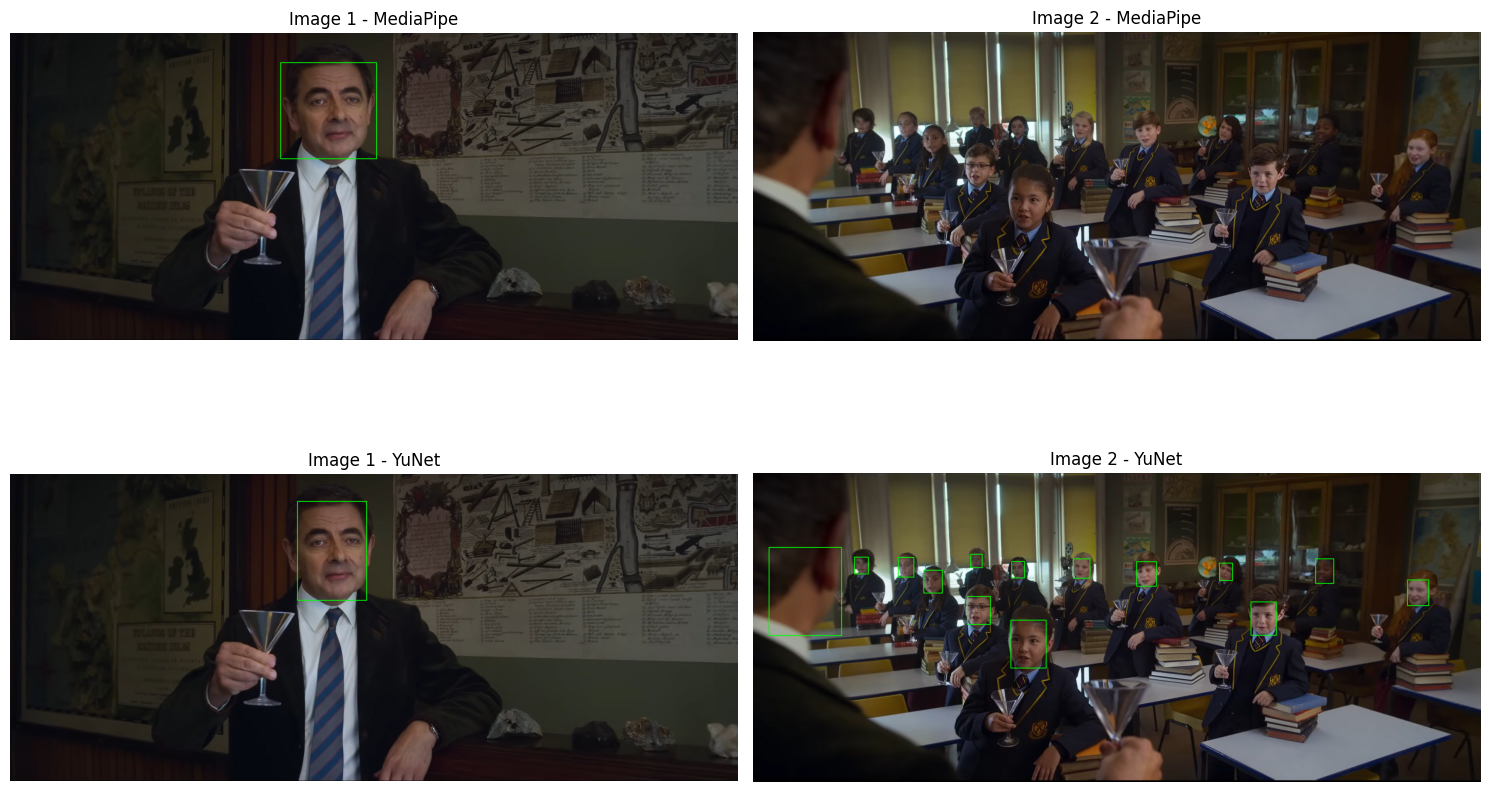

In [13]:
# Initialize MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection

# Initialize YuNet Face Detector
model_path = 'models/face_detection_yunet_2023mar.onnx'  # Path to your YuNet ONNX model
yunet_detector = cv.FaceDetectorYN_create(
    model=model_path,
    config="",
    input_size=(300, 300),  # Initial input size
    score_threshold=0.5,
    nms_threshold=0.3,
    top_k=5000
)

# Load the two images
image1 = cv.imread('images/johnny-english-capture-1.png')
image2 = cv.imread('images/johnny-english-capture-2.png')

# Perform face detection using both models
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=min_detection_confidence) as face_detection:
    # MediaPipe Results
    image1_mediapipe = utils.detect_faces_mediapipe(image1.copy(), face_detection)
    image2_mediapipe = utils.detect_faces_mediapipe(image2.copy(), face_detection)

# YuNet Results
image1_yunet = utils.detect_faces_yunet(image1.copy(), yunet_detector)
image2_yunet = utils.detect_faces_yunet(image2.copy(), yunet_detector)

# Convert images to RGB for Matplotlib
image1_mediapipe_rgb = cv.cvtColor(image1_mediapipe, cv.COLOR_BGR2RGB)
image2_mediapipe_rgb = cv.cvtColor(image2_mediapipe, cv.COLOR_BGR2RGB)
image1_yunet_rgb = cv.cvtColor(image1_yunet, cv.COLOR_BGR2RGB)
image2_yunet_rgb = cv.cvtColor(image2_yunet, cv.COLOR_BGR2RGB)

# Plot results for comparison
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig, axs = plt.subplots(2, 2)

# Display MediaPipe results
axs[0, 0].imshow(image1_mediapipe_rgb)
axs[0, 0].axis('off')
axs[0, 0].set_title("Image 1 - MediaPipe")

axs[0, 1].imshow(image2_mediapipe_rgb)
axs[0, 1].axis('off')
axs[0, 1].set_title("Image 2 - MediaPipe")

# Display YuNet results
axs[1, 0].imshow(image1_yunet_rgb)
axs[1, 0].axis('off')
axs[1, 0].set_title("Image 1 - YuNet")

axs[1, 1].imshow(image2_yunet_rgb)
axs[1, 1].axis('off')
axs[1, 1].set_title("Image 2 - YuNet")

plt.tight_layout()
plt.show()


## Character recognition

TODO: Expliquer l'apporoche pour classifier les visages

In [14]:
known_face_encodings, known_face_names = utils.load_embeddings('embeddings/face_embeddings_multiple.pkl')

Successfully loaded 5 embeddings from embeddings/face_embeddings_multiple.pkl


In [15]:
known_face_encodings

[array([-1.00824006e-01,  9.71191451e-02,  9.86282602e-02, -2.91456878e-02,
        -4.03978489e-02,  1.10149883e-01,  1.72984805e-02, -1.14352964e-01,
         9.22664925e-02,  3.51157435e-03,  2.33389392e-01,  4.71938848e-02,
        -3.25349689e-01, -2.48499680e-02,  5.68902716e-02,  9.77530554e-02,
        -1.18988410e-01, -1.22066632e-01, -1.69188812e-01, -3.82877626e-02,
        -7.78535381e-03,  6.78626522e-02,  1.94972698e-02,  2.25120578e-02,
        -1.72842100e-01, -2.57180035e-01, -7.21551627e-02, -1.14061497e-02,
         1.57590322e-02, -2.08174810e-01,  8.83726869e-03,  4.57920786e-03,
        -1.49457961e-01,  1.87748224e-02, -2.74600759e-02,  1.24289803e-02,
        -6.11610822e-02, -1.34269223e-01,  2.47711778e-01,  9.21554938e-02,
        -1.60732910e-01,  3.39646749e-02,  2.69815810e-02,  3.11040938e-01,
         2.44447619e-01, -5.44647239e-02,  1.87461320e-02, -2.09922045e-02,
         1.42244920e-01, -3.42277676e-01,  3.28692570e-02,  1.22355066e-01,
         1.2

In [16]:
known_face_names

['Agent Bough',
 'Agent Bough',
 'Johnny English',
 'Johnny English',
 'Johnny English']

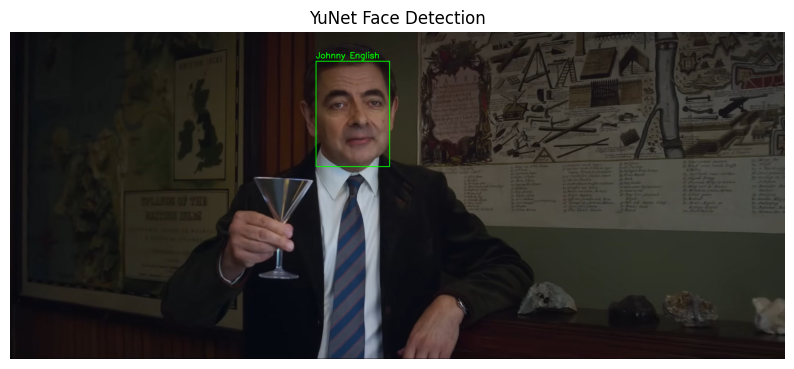

In [17]:
img = utils.detect_characters_yunet(image1.copy(), face_detector, known_face_encodings, known_face_names)

# Convert frame to RGB for Matplotlib
frame_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the image with Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(frame_rgb)
plt.axis("off")
plt.title("YuNet Face Detection")
plt.show()

On s'amuse un peu

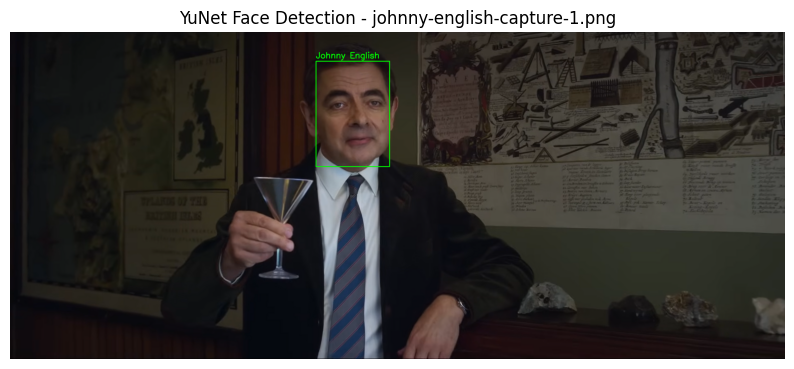

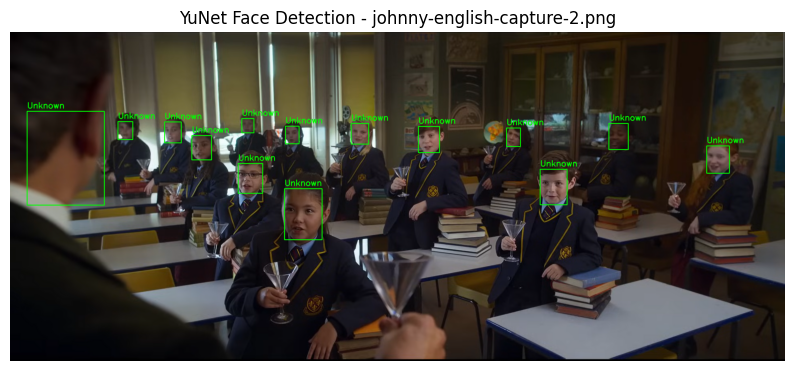

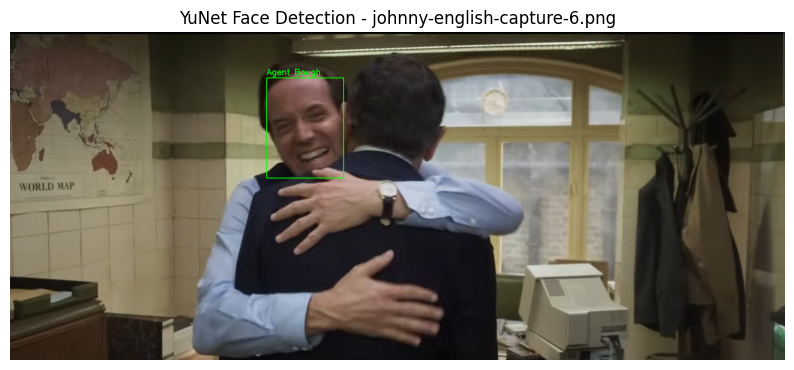

In [20]:
image_paths = [
    'images/johnny-english-capture-1.png',
    'images/johnny-english-capture-2.png',
    'images/johnny-english-capture-6.png',
]

for img_path in image_paths:
        # Load the image
        image = cv.imread(img_path)
        # Perform face detection using YuNet
        img = utils.detect_characters_yunet(image.copy(), face_detector, known_face_encodings, known_face_names, detection_threshold = 0.6)
        # Convert the image to RGB for Matplotlib
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Display the image with Matplotlib
        plt.figure(figsize=(10, 8))
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.title(f"YuNet Face Detection - {img_path.split('/')[-1]}")  # Title with image filename
        plt.show()


Notre modèle fonctionne mais sur certaines frames on a encore du mal à reconnaitre le personnage

TODO: texte pour dire que YuNet video processing permet d'appliquer le traitement sur une vidéo et que le resultat est ./videos/trailer_processed.mp4"

TODO : Expliquer qu'il est possible de voir les vidéos résultats